# **COMPONENTES PRINCIPALES**

```
Versión   : 1.O, Adaptado del curso de Aprendizaje Automatico
Autor     : Pfoccori Quispe Alex Harvey
Lugar     : Cusco, Perú, 2023.
Proposito : PCA y reducción de dimensionalidad
```

### Librería

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Modulo de PCA
from sklearn.decomposition import PCA
from timeit import default_timer as timer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

### **Importación de datos**

**DESCRIPCIÓN**

La mayoría de nosotros conocemos a alguien que luchó contra el cáncer de mama, o al menos escuchamos sobre las luchas que enfrentan los pacientes que luchan contra el cáncer de mama. El cáncer de mama es el cáncer más frecuente entre las mujeres, afectando a 2,1 millones de mujeres cada año. El cáncer de mama causa el mayor número de muertes relacionadas con el cáncer entre las mujeres. Solo en 2018, se estima que 627 000 mujeres murieron de cáncer de mama.

La parte más importante de un proceso de toma de decisiones clínicas en pacientes con cáncer, en general, es la estimación precisa del pronóstico y la duración de la supervivencia. Pacientes con cáncer de mama con el mismo estadio de la enfermedad y las mismas características clínicas pueden tener diferentes respuestas al tratamiento y supervivencia global, pero ¿por qué?

Los cánceres están asociados con anomalías genéticas. La expresión génica mide el nivel de actividad génica en un tejido y brinda información sobre sus actividades complejas. La comparación de los genes expresados ​​en tejido normal y enfermo puede brindar mejores conocimientos sobre el pronóstico y los resultados del cáncer. El uso de técnicas de aprendizaje automático en datos genéticos tiene el potencial de dar la estimación correcta del tiempo de supervivencia y puede evitar procedimientos quirúrgicos y de tratamiento innecesarios.

**CONTENIDO**

La base de datos del Consorcio Internacional de Taxonomía Molecular del Cáncer de Mama (METABRIC) es un proyecto Canadá-Reino Unido que contiene datos de secuenciación específica de 1980 muestras primarias de cáncer de mama. Los datos clínicos y genómicos se descargaron de cBioPortal.

El conjunto de datos fue recopilado por el profesor Carlos Caldas del Cambridge Research Institute y el profesor Sam Aparicio del British Columbia Cancer Center en Canadá y publicado en Nature Communications (Pereira et al., 2016). También apareció en varios artículos, incluidos Nature y otros:

In [2]:
datos = pd.read_csv("./METABRIC_RNA_Mutation.csv", sep=',')
datos.head()

,type,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,claudin-low,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,LumA,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,LumB,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,LumB,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,LumB,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 490 entries, type to ugt2b7
dtypes: float64(489), object(1)
memory usage: 7.1+ MB


### Distribución de datos

In [4]:
# Cáncer Benigno y Maligno
datos.groupby('type').size()

type
Basal          199
Her2           220
LumA           679
LumB           461
NC               6
Normal         140
claudin-low    199
dtype: int64

In [6]:
X = datos.drop(['type'], axis=1)
y = datos['type']

# **1. Estandarización de datos (requisito para aplicar PCA)**

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

ss = StandardScaler()
X_std = ss.fit_transform(X)

X_std


array([[-1.39900057, -0.57379978, -1.62169954, ..., -0.59540058,
        -0.88470045, -0.33540019],
       [-1.38000055,  0.27770052, -1.21539975, ..., -0.22640071,
         0.53980028, -0.89200052],
       [ 0.06700069, -0.84259988,  0.21139952, ...,  1.37009874,
        -0.10780006,  0.36550021],
       ...,
       [ 1.81070218, -0.26079967,  0.40059943, ..., -0.18400072,
         0.09670005, -0.62640036],
       [-1.27460046, -1.76950021, -0.34540019, ..., -0.49150062,
        -0.28470015, -0.80410047],
       [-0.75250001,  0.73520068,  0.6447993 , ..., -0.23160071,
        -0.20810011, -0.43280025]])

# **2. Determinación del número óptimo de componentes mediante covarianzas**

Se utiliza la varianza explicada acumulada, y se selecciona el número de componentes mínimo a partir del cual el incremento deja de ser sustancial

In [8]:
# número de atributos de entrada
nums = np.arange(datos.shape[1] - 1)
var_ratio = []

# Determina la varianza explicada para 1, 2, 3, ... 30 componentes
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(X_std)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))


Text(0.5, 1.0, 'Componentes vs Varianza explicada')

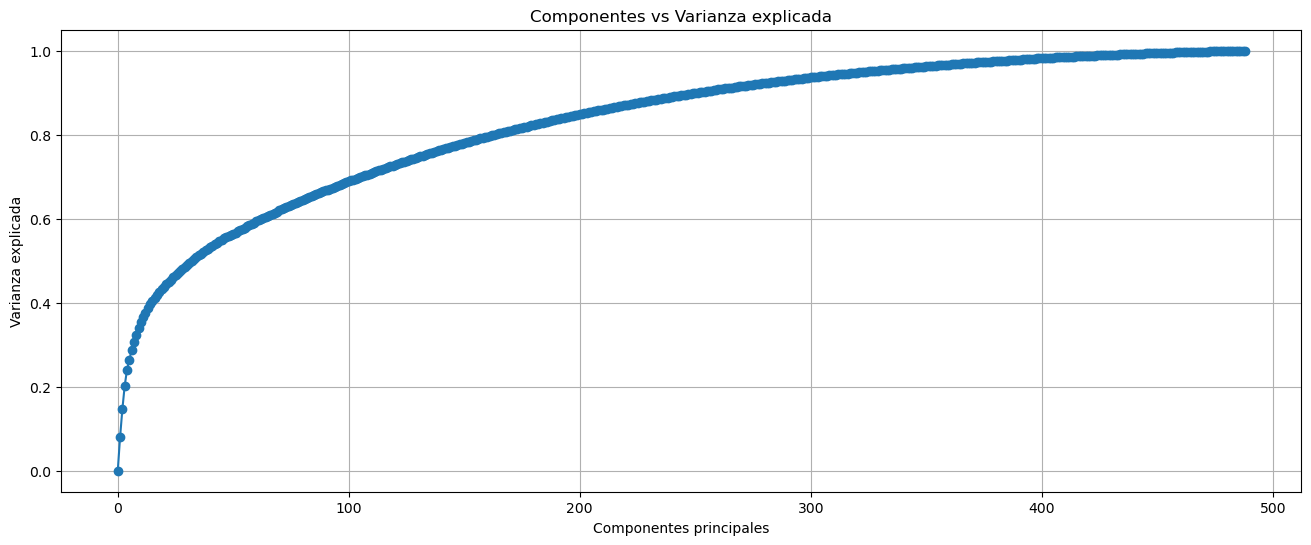

In [9]:
# Gráfico de cantidad de componentes y varianza explicada
plt.figure(figsize=(16, 6))
plt.grid()
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Componentes vs Varianza explicada')

**OBSERVACIONES**

> Para **100 componentes**, se consigue una varianza explicativa de **70%**

> Para **200 componentes**, se consigue una varianza explicativa de **85%**

> Para **500 componentes**, se consigue una varianza explicativa de **99%**

> Y asi sucesivamente

> Para **500 componentes**, se consigue una varianza explicativa de **99%**, luego se este punto podemos afirmar que la disminución de la variaza no es sustancial

Motivo por el cual podemos reducir la dimensionalidad de **490** a **400**, previmente aplicando PCA

# **3. Transformación de datos**

Generación del nuevo dataset a partir de 18 componentes principales

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=400)

# Transformacion de valor originales a valores de componentes principales
X_pca = pca.fit_transform(X_std)
new_datos = pd.DataFrame(X_pca, columns=['CP' + str(i) for i in range(1,401)])

new_datos['Diagnostico'] = y

new_datos.head()

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,...,CP392,CP393,CP394,CP395,CP396,CP397,CP398,CP399,CP400,Diagnostico
0,-10.533945,-4.087880,-11.387812,0.154445,9.823816,6.693941,4.166369,-2.483778,-4.740353,5.346424,...,0.292832,-0.813223,0.116371,0.451237,-0.447390,0.268016,0.548040,0.347929,-0.070716,claudin-low
1,-1.942492,-3.482538,5.445905,2.019010,-1.652827,-0.882294,-0.762182,-0.906362,-0.801025,3.779433,...,-0.092454,-0.420260,-0.111886,-0.239415,0.134039,0.326449,-0.029636,-0.336593,0.006315,LumA
2,-15.432223,0.134213,6.029177,11.513846,-4.836876,-2.832701,0.399011,2.919774,-0.988428,-0.457762,...,-0.679424,-0.125955,0.224799,-0.418348,0.740815,-0.105592,-0.372022,0.007228,0.616722,LumB
3,-12.234126,2.768999,7.537100,15.477792,-3.592763,0.154849,1.717898,-3.986714,2.693640,1.773778,...,0.112581,-0.443552,-0.196028,-0.049035,-0.204594,-0.419710,0.199970,-0.582170,0.021377,LumB
4,-3.881098,3.104257,7.540823,-2.839975,-0.611349,4.971570,-4.555813,-1.124574,1.457884,4.935643,...,0.208419,-0.195068,0.554504,-0.374543,0.163476,0.318795,-0.444225,-0.653211,0.200203,LumB


In [12]:
new_datos.to_csv('metabric_rna_mutation_pca.csv', index=False)

# **4. Aplicación de algoritmo de predicción**

## **4.1. Aplicación de una algoritmo de red neuronal con 490 dimensiones**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=5, test_size=0.3)

In [14]:
%%time
rna = MLPClassifier(hidden_layer_sizes=(500, 400, 200, 100, 50, 10), alpha=0.01, activation='relu')
rna.fit(X_train, y_train)

CPU times: total: 1min 50s
Wall time: 1min


MLPClassifier(alpha=0.01, hidden_layer_sizes=(500, 400, 200, 100, 50, 10))

In [15]:
from sklearn.metrics import confusion_matrix
pred = rna.predict(X_test)
matriz = confusion_matrix(y_test, pred)
print(matriz)
print('Acurracy = ', rna.score(X_test, y_test))

[[ 46   8   1   1   0   2  11]
 [  3  43   5  16   0   1   0]
 [  0   4 170  15   0  12   1]
 [  1   9  32 104   0   0   1]
 [  0   0   1   1   0   0   0]
 [  1   1  16   1   0  17   2]
 [  6   2   2   0   0   3  33]]
Acurracy =  0.722027972027972


## **4.2. Aplicación de una red neuronal con 400 dimensiones**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=5, test_size=0.3)

In [17]:
%%time
rna = MLPClassifier(hidden_layer_sizes=(500, 400, 200, 100, 50, 10), alpha=0.01, activation='relu')
rna.fit(X_train, y_train)

CPU times: total: 2min 5s
Wall time: 1min 16s


MLPClassifier(alpha=0.01, hidden_layer_sizes=(500, 400, 200, 100, 50, 10))

In [18]:
from sklearn.metrics import confusion_matrix
pred = rna.predict(X_test)
matriz = confusion_matrix(y_test, pred)
print(matriz)
print('Acurracy = ', rna.score(X_test, y_test))

[[ 50   7   1   0   0   1  10]
 [  5  42   6  12   0   1   2]
 [  1   3 176  12   0   9   1]
 [  0   6  36 101   0   0   4]
 [  0   0   1   1   0   0   0]
 [  0   3  17   1   0  14   3]
 [  8   0   3   0   0   1  34]]
Acurracy =  0.7290209790209791
